In [1]:
import os
import tensorflow as tf
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import Callback, TensorBoard, ModelCheckpoint

Using TensorFlow backend.


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('/tmp/data', one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [3]:
#LOGDIR = './graphs'
NAME = "WAZIR_MODEL_SCALE_3"
# Hyperparameters
LEARNING_RATE = 0.01
BATCH_SIZE = 1000
EPOCHS = 10
# Layers
HL_1 = 1000
HL_2 = 500
# Other Parameters
INPUT_SIZE = 28*28
N_CLASSES = 10

In [4]:
model = Sequential()
model.add(Dense(1000, input_dim=INPUT_SIZE))
model.add(Activation("relu"))
model.add(Dense(500))
model.add(Activation("relu"))
model.add(Dropout(rate=0.9))
model.add(Dense(10, activation="softmax"))

In [5]:
model.compile(
    optimizer="Adam",
    loss="categorical_crossentropy",
    metrics=['accuracy'])

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              785000    
_________________________________________________________________
activation_1 (Activation)    (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               500500    
_________________________________________________________________
activation_2 (Activation)    (None, 500)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5010      
Total params: 1,290,510
Trainable params: 1,290,510
Non-trainable params: 0
_________________________________________________________________


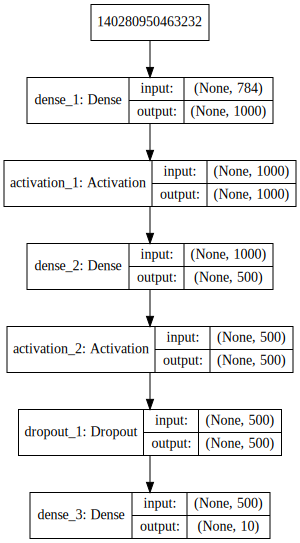

In [7]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [10]:
cb = TensorBoard(log_dir="logs/{}".format(NAME))

history_callback = model.fit(
    x=mnist.train.images,
    y=mnist.train.labels,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[cb])

Epoch 1/10
55000/55000 [==============================] - 21s 376us/step - loss: 0.0372 - acc: 0.9890
Epoch 2/10
55000/55000 [==============================] - 19s 348us/step - loss: 0.0338 - acc: 0.9905
Epoch 3/10
55000/55000 [==============================] - 20s 355us/step - loss: 0.0309 - acc: 0.9915
Epoch 4/10
55000/55000 [==============================] - 22s 393us/step - loss: 0.0261 - acc: 0.9922
Epoch 5/10
55000/55000 [==============================] - 21s 380us/step - loss: 0.0256 - acc: 0.9925
Epoch 6/10
55000/55000 [==============================] - 30s 553us/step - loss: 0.0219 - acc: 0.9937
Epoch 7/10
55000/55000 [==============================] - 23s 411us/step - loss: 0.0198 - acc: 0.9944
Epoch 8/10
55000/55000 [==============================] - 27s 487us/step - loss: 0.0174 - acc: 0.9948
Epoch 9/10
55000/55000 [==============================] - 20s 357us/step - loss: 0.0166 - acc: 0.9954
Epoch 10/10
55000/55000 [==============================] - 20s 361us/step - loss: 

# go terminal type workon wazir 
tensorboard --logdir='./logs'
if not working
you can free the tensorboard
After killing the process run 
fuser 6006/tcp -k 
to free the port 6006 (if you're in linux) and fire tensorboard again.
(TO VISUALIZE USE  *, \w)